<a href="https://colab.research.google.com/github/p4arth/Statistics/blob/main/EDAonMeteroiteData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Meteorite data.xlsx - meteorite-landings.csv')

In [3]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
data.shape

(45716, 10)

In [5]:
data['mass'].loc[0:10000]

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
9996         32.9
9997          1.5
9998         12.7
9999         14.5
10000        18.5
Name: mass, Length: 10001, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


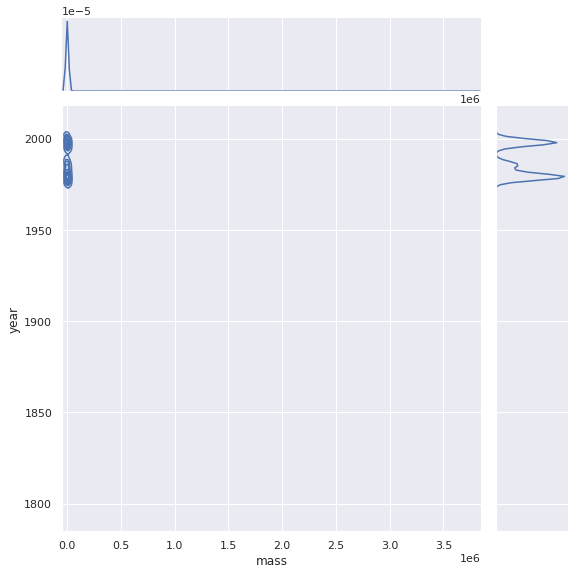

In [6]:
from matplotlib.pyplot import figure
sns.set()
sns.jointplot(x = data['mass'].loc[40000:] , y = data['year'].loc[40000:], kind = 'kde', height=8, aspect=15)
plt.show()

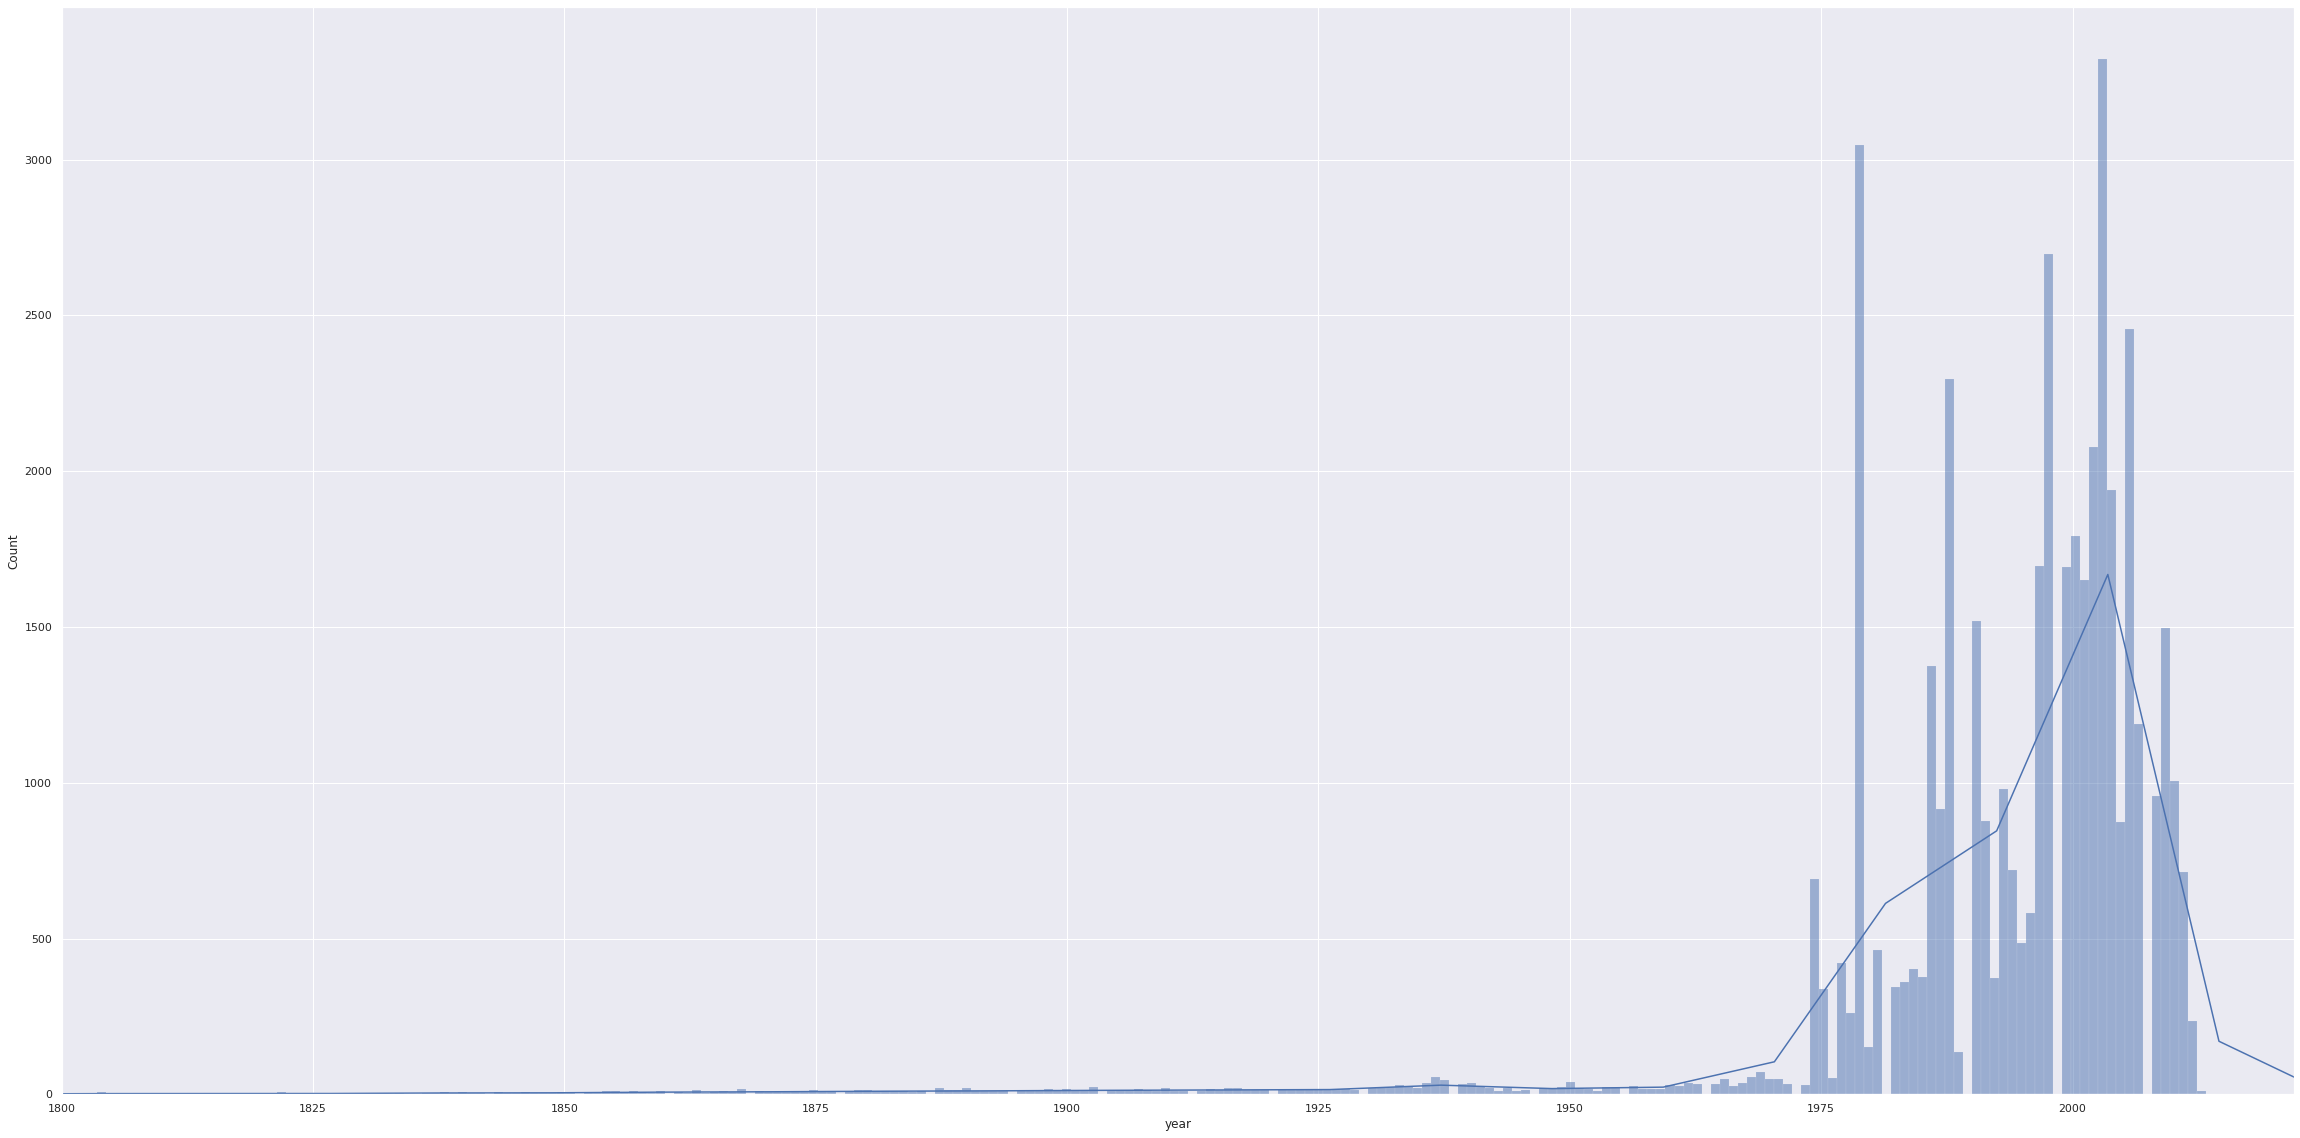

In [7]:
fig, ax = plt.subplots(figsize=(40, 20))
plot = sns.histplot(data['year'],kde=True)
plot.set_xlim(1800, 2022)
plt.show()
# Graph is hightly skewed towards the right
# Probably because there we not enough instruments to measure meteorites during the early 80's-90's

Sampling masses to verify the Central Limit Theorem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


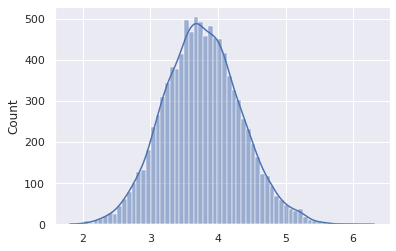

In [16]:
import random

def sample_means(pop_samples,sample_size,n_samples): 
  '''
  This function helps in getting n iid samples from a list of data values
  '''
  sample_means = []
  for i in range(n_samples):
    sample_list = np.random.choice(pop_samples, size =sample_size, replace = False)
    sample_mean = np.nanmean(sample_list)
    sample_means.append(sample_mean)
  return sample_means


pop_samples = [np.log(x) for x in data['mass']] # normalizing the masses

means = sample_means(pop_samples,20,10000)

# Plotting the histogram of mean of iid samples of asteroid masses
sns.histplot(means, kde=True)
plt.show()

# The distribution converges to a normal distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


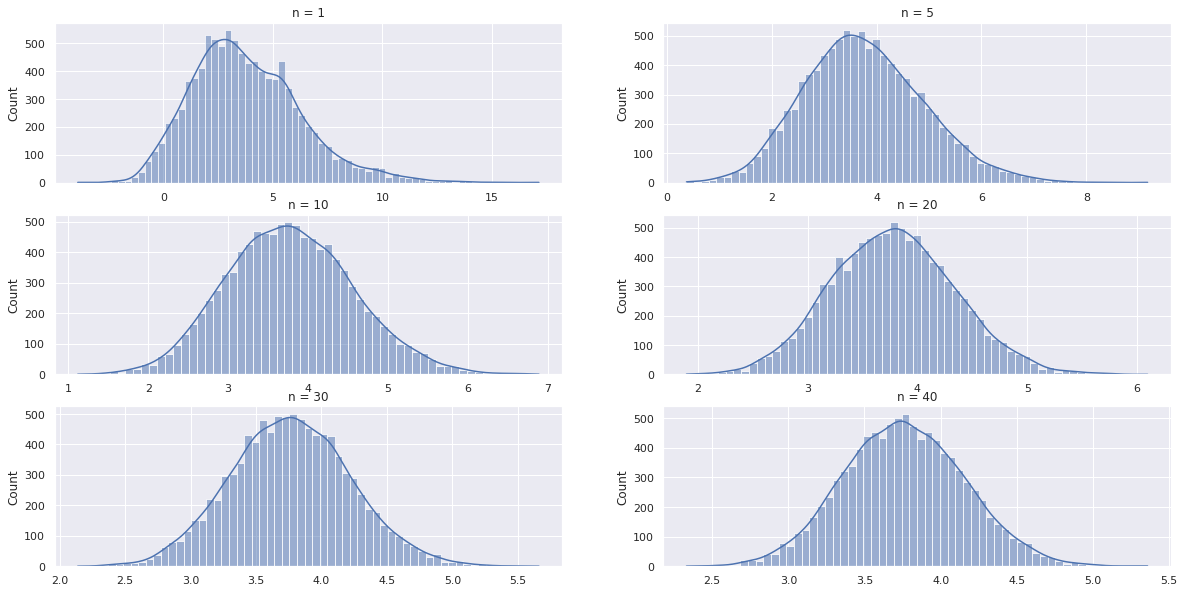

In [34]:
fig, axs = plt.subplots(3,2, figsize=(20, 10))
pop_samples = [np.log(x) for x in data['mass']] # normalizing the masses

# Checking for differen n values
sns.histplot(sample_means(pop_samples,1,10000), ax=axs[0,0], kde= True)
axs[0, 0].set_title('n = 1')

sns.histplot(sample_means(pop_samples,5,10000), ax=axs[0,1], kde= True)
axs[0, 1].set_title('n = 5')

sns.histplot(sample_means(pop_samples,10,10000),ax=axs[1,0], kde= True)
axs[1, 0].set_title('n = 10')

sns.histplot(sample_means(pop_samples,20,10000),ax=axs[1,1], kde= True)
axs[1, 1].set_title('n = 20')

sns.histplot(sample_means(pop_samples,30,10000),ax=axs[2,0], kde= True)
axs[2, 0].set_title('n = 30')

sns.histplot(sample_means(pop_samples,40,10000),ax=axs[2,1], kde= True)
axs[2, 1].set_title('n = 40')

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


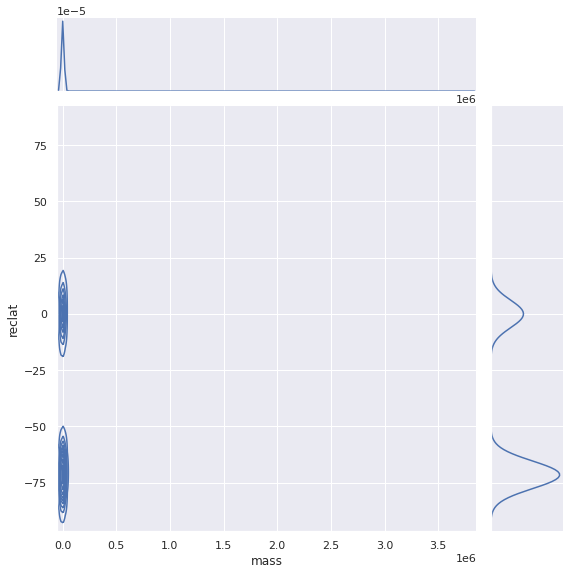

In [9]:
sns.set()
sns.jointplot(x = data['mass'].loc[40000:] , y = data['reclat'].loc[40000:], kind = 'kde', height=8, aspect=15)
plt.show()